# 实验介绍
1. 实验内容


    本实验围绕如何实现商品推荐系统展开介绍了如何对电商平台数据进行数据处理和协同过滤的方法。

2. 实验目标


    1.掌握数据准备和预处理的常用方法。 
    2.Matplotlib数据可视化
    3.SVD 算法的使用
    4.掌握通过协同过滤的方法实现推荐系统


3. 实验环境


      Python 3.6

      

# 实验过程

## 案例背景

目前，电商平台是日常生活购物的重要途经。电商平台上的商量琳琅满目，为了提高客户的体验感，更好的服务客户，电商平台通常使用不同的推荐系统为客户提供商品推荐。推荐系统是一种信息过滤系统，旨在预测用户感兴趣的“评级”或偏好。

<font color=black size=4 face=雅黑>**【知识扩展1】**</font>

<font color=green size=3 face=雅黑>**如何确定图像保留最小信息？**</font>  


三个， 1. 是否存在缺失值 2. 是否存在异常值 3. 是否属于正态分布。

###  1.读取数据

NumPy 库中的函数实现对数组的基本操作。pandas 提供了诸多的数据处理方法和时间序列的操作方法。

In [31]:
#导入项目中所需的模块包
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#读取数据
electronics_data = pd.read_csv(r'ratings_Electronics.csv',names=['userId', 'productId','Rating','timestamp'])
electronics_data

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
...,...,...,...,...
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200


### 2.查看数据

<font color=blue size=2 face=雅黑>**2.1数据概览**</font>  
进行查看读取的数据形态，可以使用 head（）函数参看数据的前五行。大致了解得到的数据‘样貌’。

In [3]:
electronics_data.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


<font color=blue size=2 face=雅黑>**2.2查看数据大小**</font>  
查看到数据前 5 行信息后，进而参看数据中含有的样本数目和特征数目，可以使用 shape函数参看数据的大小.

In [4]:
electronics_data.shape

(7824482, 4)

<font color=black size=3 face=雅黑>**注：得到的数据中数据样本数量是多少，特征数目是多少，是否出现了数据不平衡问题？**</font>  

行的数目，列的数目，是存在数据不平衡问题，由于是探究的是特征之间的相关性，并
非需要大量的特征进行分类或预测。

<font color=black size=4 face=雅黑>**【知识扩展2】**</font>

<font color=green size=3 face=雅黑>**本例对不均衡数据采用了过抽样的方法，除此之外还有哪些方法处理不均衡数据？**</font>  

对数据集进行重采样(欠采样、过采样)，K-fold 交叉验证、一分类和组合不同的重采样数据集。

 <font color=blue size=2 face=雅黑>**2.3参看数据类型**</font>   
得知数据大小后，仍需要参看数据的类型，以方便以后使用数据进行做数据运算。可以使用 dtypes（）函数进行查看数据的类型。

In [5]:
electronics_data.dtypes

userId        object
productId     object
Rating       float64
timestamp      int64
dtype: object

从结果可以看出，仅 Rating 和 Timetamp 是数值类型，可以进行数学运算。如果 user ID和 productID 需要进行数学运算，需要对其类型进行转换。另外，也可以使用 info（）函数对数据的大致情况进行查看。

In [6]:
electronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   Rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


从结果可以看出，数据的样本数目、特征类型、数据类型和数据存储大小。默认 info 函数展示这几个方面，也可以设置某项为 False，不进行对该项信息的查看。比如不想查看数据存储大小，代码可以为：

In [7]:
electronics_data.info(memory_usage =False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     object 
 1   productId  object 
 2   Rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)

<font color=blue size=2 face=雅黑>**2.4查看用户对商品的评级数据**</font>  
评级数据是重要的数据，能够反映用户对商品的喜好程度。能否实现高效的推荐系统，该数据至关重要，可以通过 describe 函数参看数值型的数据概览。如果想只看 Rating 的数据初步分析，可用中括号加其对应的列名。

```Python
electronics_data.describe()['Rating']
```

从结果可以看出该数据的平均值、最大值、最小值、标准差和四分位数，以及商品的普遍的分数在 4 左右，进而使用 min()和 Max()函数打印出级别的最大最小值。

In [8]:
print('Minimum rating is: %d' %(electronics_data.Rating.min()))
print('Maximum rating is: %d' %(electronics_data.Rating.max()))

Minimum rating is: 1
Maximum rating is: 5


如果想打印结果或打印某参数的数值，可以使用 print()函数。从结果可以看出，最大级别是 5，也就说明用户对商品的评价普遍偏高。

<font color=black size=4 face=雅黑>**【知识扩展3】**</font>

<font color=green size=3 face=雅黑>**可以用标准差反应什么问题呢？**</font>  

标准差可以反应数据的稳定性和其分布大致形态。

<font color=blue size=2 face=雅黑>**2.5查看数据的缺省值情况**</font>  
数据的质量影响最重要的因素是缺省值和异常值的情况。由于已经查看过级别数据没有异常情况，均在正常范围内，所以需使用 isnull()函数判断数据是否为空，进而用 sum()函数统计其总数。

In [9]:
print('Number of missing values across columns: \n',electronics_data.isnull().sum())

Number of missing values across columns: 
 userId       0
productId    0
Rating       0
timestamp    0
dtype: int64


从结果可以看出，该数据并无缺失情况，数据质量比较高，这也源于数据库保留的数据比较完整。

<font color=black size=4 face=雅黑>**【知识扩展4】**</font>

<font color=green size=3 face=雅黑>**对级别数据进行查看，确保其无异常值，为什么没有对商品和用户的 ID 数据进行查看呢？**</font>  

这两部分数据是不是数值数据，无法查看，即使是数值数据也无需查看，因为这仅是一种用户和商品的索引号，并不根据其做相关运算

<font color=blue size=2 face=雅黑>**2.6查看用户和商品的唯一性**</font>    
由于一个用户可以对多种商品进行评级，同理一个商品也会被不同用户进行评级。如果想确定商品种类和用户数量，需要查看用户和商品的唯一性。

In [10]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",electronics_data.shape[0])
print("Total No of Users :", len(np.unique(electronics_data.userId)))
print("Total No of products :", len(np.unique(electronics_data.productId)))

Total data 
--------------------------------------------------

Total no of ratings : 7824482
Total No of Users : 4201696
Total No of products : 476002


从结果可以看出，有近 5 百万的商品，4 百多万用户产生近 8 百万的评级次数。

### 3.数据处理

用户对商品的评级时间，是多余信息，可以使用 drop()函数进行删除。  
【重要参数】：  
axis：数值 1 表示删除列名部分，数值 0 表示删除索引号部分。  
inplace：逻辑值为 True 表示操作后的结果。  

In [11]:
electronics_data.drop(['timestamp'], axis=1,inplace=True)#删除时间信息
electronics_data.head()#从结果可以看出，已经删除时间部分数据。

,userId,productId,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


分别根据级别数据对用户和商品进行排序，进而对排序后的数值进行查看其概览。  
【重要函数和参数】：  
groupby()：针对那部分数据进行匹配。  
sort_values()：对一组数据进行排序。   
ascending：升序。  

In [12]:
no_of_rated_products_per_user =electronics_data.groupby(by='userId')['Rating'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: Rating, dtype: int64

In [13]:
no_of_rated_products_per_user.describe()

count    4.201696e+06
mean     1.862220e+00
std      2.885110e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      5.200000e+02
Name: Rating, dtype: float64

得到排序的得到的用户评级的商品数据，然后用 quantile()函数返回其分位数情况，并使用图标展示出来。

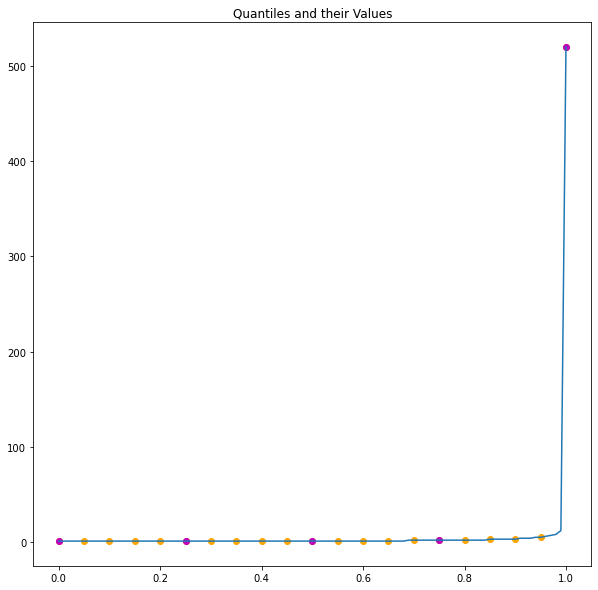

In [16]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")

No handles with labels found to put in legend.


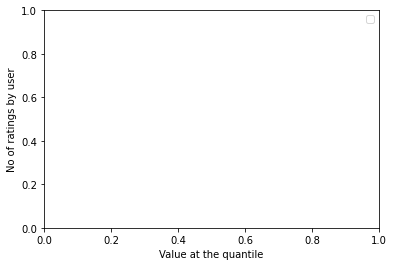

In [17]:
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [19]:
print('\n No of rated product more than 50 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 50)) )


 No of rated product more than 50 per user : 1540



从图中可以看到一个商品被多人评价的概率很大，进而打印出超过 50 个人评价的商品数量有 1540 个。

## 演练场景二：基于商品流行度实现商品推荐

通过对数据进行准备的过程中，发现可以对商品根据其被评级的情况进行排序，进而分析出商品的流行度，从而根据其流行度进而实现推荐。

<font color=black size=4 face=雅黑>**【知识扩展5】**</font>

<font color=green size=3 face=雅黑>**得到商品的流行度后，如何实现推荐呢？**</font>  
将流行度排名靠前的商品，推荐给用户。

### 1. 对商品进行排序  
可以类似用户排序一样，根据商品被评级的数据进行排序，筛选出被评级次数超过 50次的商品。

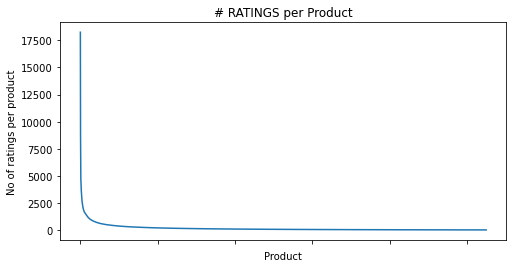

In [20]:
new_df=electronics_data.groupby("productId").filter(lambda x:x['Rating'].count() >=50)
no_of_ratings_per_product = new_df.groupby(by='productId')['Rating'].count().sort_values(ascending=False)
fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_product.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of ratings per product')
ax.set_xticklabels([])
plt.show()

### 2.针对商品的平均级别数排序

首先算出每个商品的平均级别数值，然后针对其数值进行排序。

In [23]:
#算出每个商品的平均级别数值
new_df.groupby('productId')['Rating'].mean().head()

productId
0972683275    4.470980
1400501466    3.560000
1400501520    4.243902
1400501776    3.884892
1400532620    3.684211
Name: Rating, dtype: float64

In [24]:
new_df.groupby('productId')['Rating'].mean().sort_values(ascending=False).head()

productId
B002E6R7NG    4.980392
B004I763AW    4.966667
B003J9QQWU    4.964286
B0043ZLFXE    4.955556
B000TMFYBO    4.953125
Name: Rating, dtype: float64

In [25]:
#算出商品被评级的次数排名
new_df.groupby('productId')['Rating'].count().sort_values(ascending=False).head()

productId
B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
Name: Rating, dtype: int64

In [26]:
ratings_mean_count = pd.DataFrame(new_df.groupby('productId')['Rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('productId')['Rating'].count())
ratings_mean_count.head()

,Rating,rating_counts
productId,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171


从结果可以看出：平均级别最高的商品有 1051 个用户进行评论。

### 3.结果可视化  
针对分析出来的商品排序情况进一步分析，利用图表进行直观展示结果。首先利用直方
图展示每类商品被评级的用户数目分布。

【重要函数和参数】：

    hist()：直方图；
    
    bins：绘制直方图是用的桶数。

<AxesSubplot:>

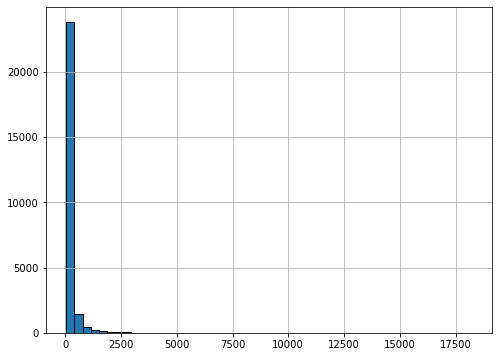

In [27]:
plt.figure(figsize=(8,6))#设置图像的大小
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

<AxesSubplot:>

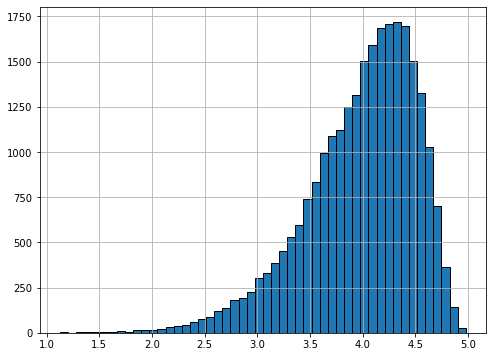

In [28]:
#进而用直方图绘制出每个级别的用户数量分布：
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

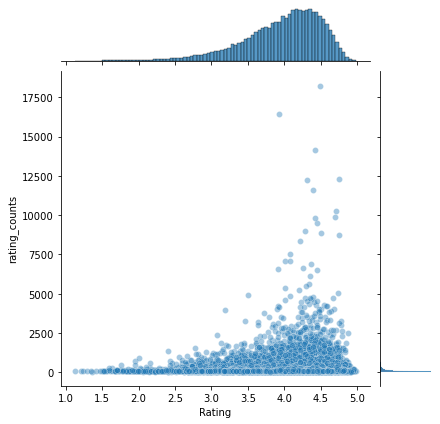

In [32]:
#使用散点图和直方图展示每个级别的用户数量数据分布：
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

<AxesSubplot:xlabel='productId'>

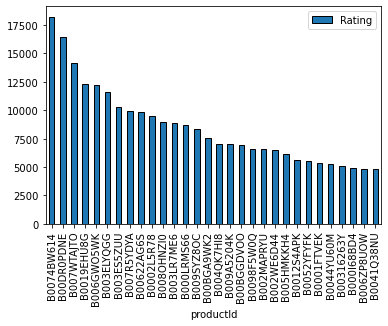

In [33]:
#被评级的用户数量，对商品进行排序，进而得到商品流行度的排序：
popular_products = pd.DataFrame(new_df.groupby('productId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(30).plot(kind = "bar")

## 演练场景三：基于协同过滤实现商品推荐

已经针对商品的流行度实现了推荐，但是说服力还是不足以满足现实的情况，进而使用目前比较流行的协同过滤的方法实现推荐系统。

<font color=black size=4 face=雅黑>**【知识扩展6】**</font>

<font color=green size=3 face=雅黑>**协同过滤方法都有哪些不同的类型呢？**</font>  

基于用户和基于商品

### 1.创建商品和用户的关系表格    
首先选取 1 万个样本，然后使用 pivot_table()创建用户和商品的关系表格。

In [34]:
new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

productId,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JPPI,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
userId,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0266076X6KPZ6CCHGVS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0571176384K8RBNKGF8O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


查看表格大小，同样也是使用 shape 参数，然后进行转置来参看一下表格，可以看到表格的数据即是该用户对商品的评级数值。

In [35]:
ratings_matrix.shape

(9832, 76)

In [36]:
X = ratings_matrix.T
X.head()

userId,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A0821988FXKFYX53V4QG,A099626739FNCRNHIKBCG,...,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXKUK895VGSM,AZXP46IB63PU8,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZST8OYL5P4Q
productId,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501520,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1400532620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
X.shape#查看数据的大小

(76, 9832)

### 2.分解表格
可以使用 SVD 算法对表格进行降维，得到基于商品的 10 个重要特征数据。

In [38]:
from sklearn.decomposition import TruncatedSVD #导入 SVD 算法
SVD = TruncatedSVD(n_components=10)#构建一个 SVD 模型，其作用是将特征数目即列数组合为 10 个重要组合特征
decomposed_matrix = SVD.fit_transform(X)#对表格进行转化
decomposed_matrix.shape#查看转化后的表格大小

(76, 10)

### 3.构建相关系数矩阵  
算出商品间的相似性，用以做基于物品的推荐系统。

In [39]:
correlation_matrix = np.corrcoef(decomposed_matrix)#corrcoef():算出数据之间的相关系数。
correlation_matrix.shape

(76, 76)

### 4.基于物品相识性推荐
首先随便选出一个商品，然后选出和其相关系数大于 0.65 的商品，并可以这些商品推荐给喜欢该商品的用户。

In [40]:
#确定商品的唯一性
i = "9984984354"
product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

20

In [41]:
#查看该商品在相识性表格中相似的商品数目
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(76,)

In [42]:
#选出相关系数大于 0.65 的商品
Recommend = list(X.index[correlation_product_ID > 0.65])
#删除商品本身
Recommend.remove(i) 
Recommend[0:10]#可以将排名靠前的商品推荐给喜欢该商品的用户

['1400532620',
 '6301977173',
 '9625993428',
 'B00000J0D2',
 'B00000J0D8',
 'B00000J1EJ',
 'B00000J1EQ',
 'B00000J1QK',
 'B00000J1SC',
 'B00000J1U8']